In [1]:
from tensorflow.keras.datasets import reuters
import tensorflow
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)


2.9.0
3.8.4
0.13.2
1.22.4
2.2.2
1.5.0


In [2]:
(x_train_a, y_train_a), (x_test_a, y_test_a) = reuters.load_data(num_words=None, test_split=0.2)

In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train_a)))
print('테스트 샘플의 수: {}'.format(len(x_test_a)))


훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
(x_train_10, y_train_10), (x_test_10, y_test_10) = reuters.load_data(num_words=10000, test_split=0.2)
print('훈련 샘플의 수: {}'.format(len(x_train_10)))
print('테스트 샘플의 수: {}'.format(len(x_test_10)))


훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [5]:
(x_train_5, y_train_5), (x_test_5, y_test_5) = reuters.load_data(num_words=5000, test_split=0.2)
print('훈련 샘플의 수: {}'.format(len(x_train_5)))
print('테스트 샘플의 수: {}'.format(len(x_test_5)))


훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [6]:
print(y_train_a[0])
print(y_test_a[0])

3
3


In [7]:
print(y_train_10[0])
print(y_test_10[0])

3
3


In [8]:
print(y_train_5[0])
print(y_test_5[0])

3
3


In [9]:
num_classes = max(y_train_a) + 1
print('a의 클래스의 수 : {}'.format(num_classes))

a의 클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


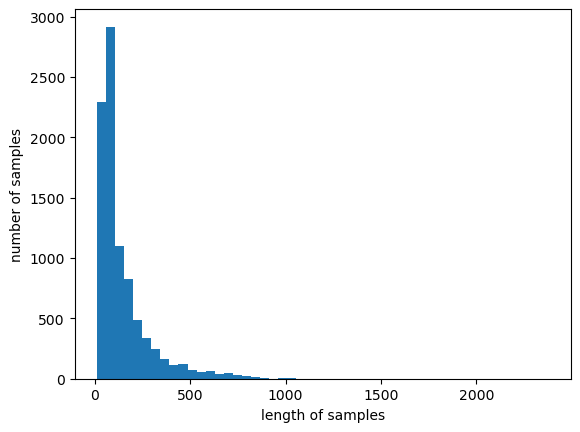

In [10]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_a)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_a))/len(x_train_a)))

plt.hist([len(s) for s in x_train_a], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


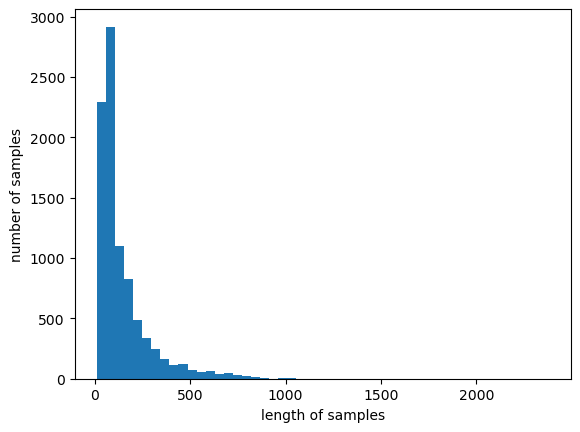

In [11]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_10)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_10))/len(x_train_10)))

plt.hist([len(s) for s in x_train_10], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


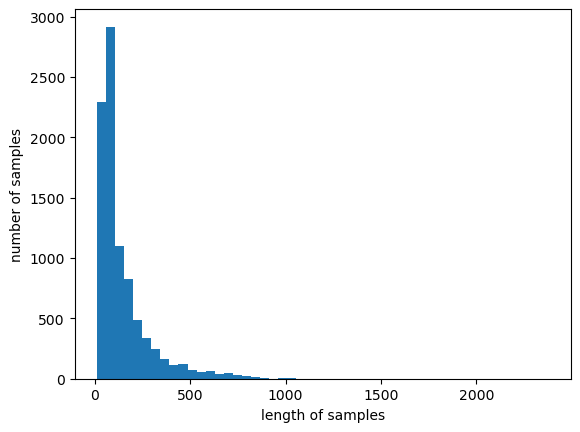

In [12]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_5)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_5))/len(x_train_5)))

plt.hist([len(s) for s in x_train_5], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

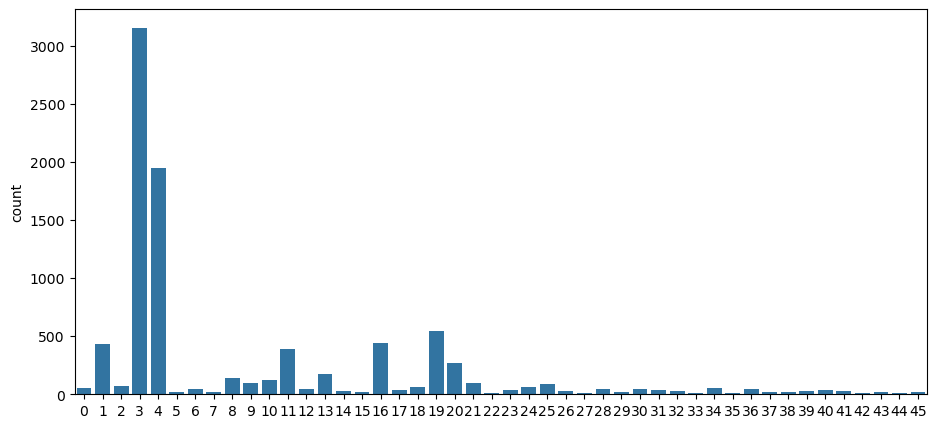

In [13]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_a)
plt.show()

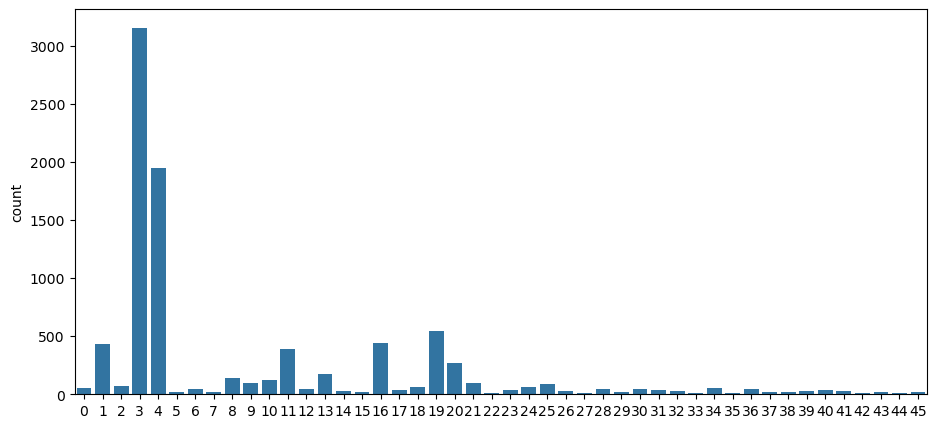

In [14]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_10)
plt.show()

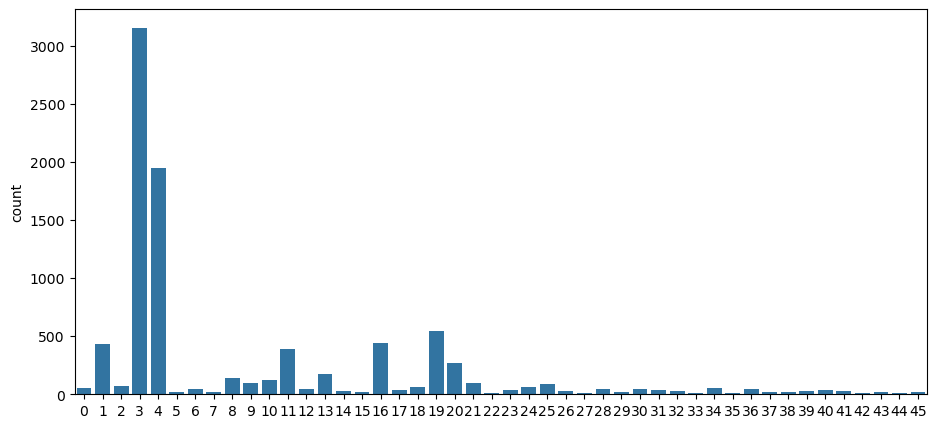

In [15]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_5)
plt.show()

In [16]:
unique_elements, counts_elements = np.unique(y_train_a, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [17]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [18]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [19]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [20]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [21]:
print(' '.join([index_to_word[index] for index in x_train_10[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [22]:
print(' '.join([index_to_word[index] for index in x_train_a[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [23]:
print(' '.join([index_to_word[index] for index in x_train_5[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [24]:
sequence = [4, 587, 23, 133, 6, 30, 515]

# 정수 시퀀스를 텍스트 시퀀스로 변환
text_sequence = [index_to_word[i] for i in sequence]

# 결과 출력
text_sequence

['the', 'transaction', 'is', 'expected', 'to', 'be', 'completed']

In [25]:
decoded = []
for i in range(len(x_train_a)):
    t = ' '.join([index_to_word[index] for index in x_train_a[i]])
    decoded.append(t)

x_train_a = decoded
print(len(x_train_a))


8982


In [26]:
decoded2 = []

for i in range(len(x_test_a)):
    t = ' '.join([index_to_word[index] for index in x_test_a[i]])
    decoded2.append(t)

x_test_a = decoded2
print(len(x_test_a))


2246


In [27]:
decoded = []
for i in range(len(x_train_10)):
    t = ' '.join([index_to_word[index] for index in x_train_10[i]])
    decoded.append(t)

x_train_10 = decoded
print(len(x_train_10))

decoded2 = []

for i in range(len(x_test_10)):
    t = ' '.join([index_to_word[index] for index in x_test_10[i]])
    decoded2.append(t)

x_test_10 = decoded2
print(len(x_test_10))


8982
2246


In [28]:
decoded = []
for i in range(len(x_train_5)):
    t = ' '.join([index_to_word[index] for index in x_train_5[i]])
    decoded.append(t)

x_train_5 = decoded
print(len(x_train_5))

decoded2 = []

for i in range(len(x_test_5)):
    t = ' '.join([index_to_word[index] for index in x_test_5[i]])
    decoded2.append(t)

x_test_5 = decoded2
print(len(x_test_5))

8982
2246


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [30]:
dtmvector1 = CountVectorizer()
x_train_dtm1 = dtmvector1.fit_transform(x_train_10)
print(x_train_dtm1.shape)

(8982, 9670)


In [31]:
dtmvector2 = CountVectorizer()
x_train_dtm2 = dtmvector2.fit_transform(x_train_5)
print(x_train_dtm2.shape)

(8982, 4867)


In [32]:
dtmvector3 = CountVectorizer()
x_train_dtm3 = dtmvector3.fit_transform(x_train_a)
print(x_train_dtm3.shape)

(8982, 26506)


In [43]:
tfidf_transformer1 = TfidfTransformer()
tfidfv1 = tfidf_transformer1.fit_transform(x_train_dtm1)
print(tfidfv1.shape)

(8982, 9670)


In [44]:
tfidf_transformer2 = TfidfTransformer()
tfidfv2 = tfidf_transformer2.fit_transform(x_train_dtm2)
print(tfidfv2.shape)

(8982, 4867)


In [45]:
tfidf_transformer3 = TfidfTransformer()
tfidfv3 = tfidf_transformer3.fit_transform(x_train_dtm3)
print(tfidfv3.shape)

(8982, 26506)


In [46]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산


In [47]:
model1 = MultinomialNB()
model1.fit(tfidfv1, y_train_10)

MultinomialNB()

In [48]:
model2 = MultinomialNB()
model2.fit(tfidfv2, y_train_5)

MultinomialNB()

In [49]:
model3 = MultinomialNB()
model3.fit(tfidfv3, y_train_a)

MultinomialNB()

## 나이브 베이즈 분류기

In [50]:
x_test_dtm1 = dtmvector1.transform(x_test_10)
tfidfv_test1 = tfidf_transformer1.transform(x_test_dtm1)
predicted1 = model1.predict(tfidfv_test1)
print("정확도:", accuracy_score(y_test_10, predicted1))

정확도: 0.6567230632235085


In [51]:
x_test_dtm2 = dtmvector2.transform(x_test_5) #테스트 데이터를 DTM으로 변환
tfidfv_test2 = tfidf_transformer2.transform(x_test_dtm2) #DTM을 TF-IDF 행렬로 변환

predicted2 = model2.predict(tfidfv_test2) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5, predicted2)) #예측값과 실제값 비교

정확도: 0.6731967943009796


In [52]:
x_test_dtm3 = dtmvector3.transform(x_test_a) #테스트 데이터를 DTM으로 변환
tfidfv_test3 = tfidf_transformer3.transform(x_test_dtm3) #DTM을 TF-IDF 행렬로 변환

predicted3 = model3.predict(tfidfv_test3) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_a, predicted3)) #예측값과 실제값 비교

정확도: 0.5997328584149599


### 생각보다 5000짜리가 정확도가 높게 평가됨이 보여진다.
차원의 저주이지 않을까 생각이 듭니다.

## F1 score

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [61]:
print(classification_report(y_test_10, model1.predict(tfidfv_test1), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

In [62]:
print(classification_report(y_test_5, model2.predict(tfidfv_test2), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

In [64]:
print(classification_report(y_test_a, model3.predict(tfidfv_test3), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

In [65]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')


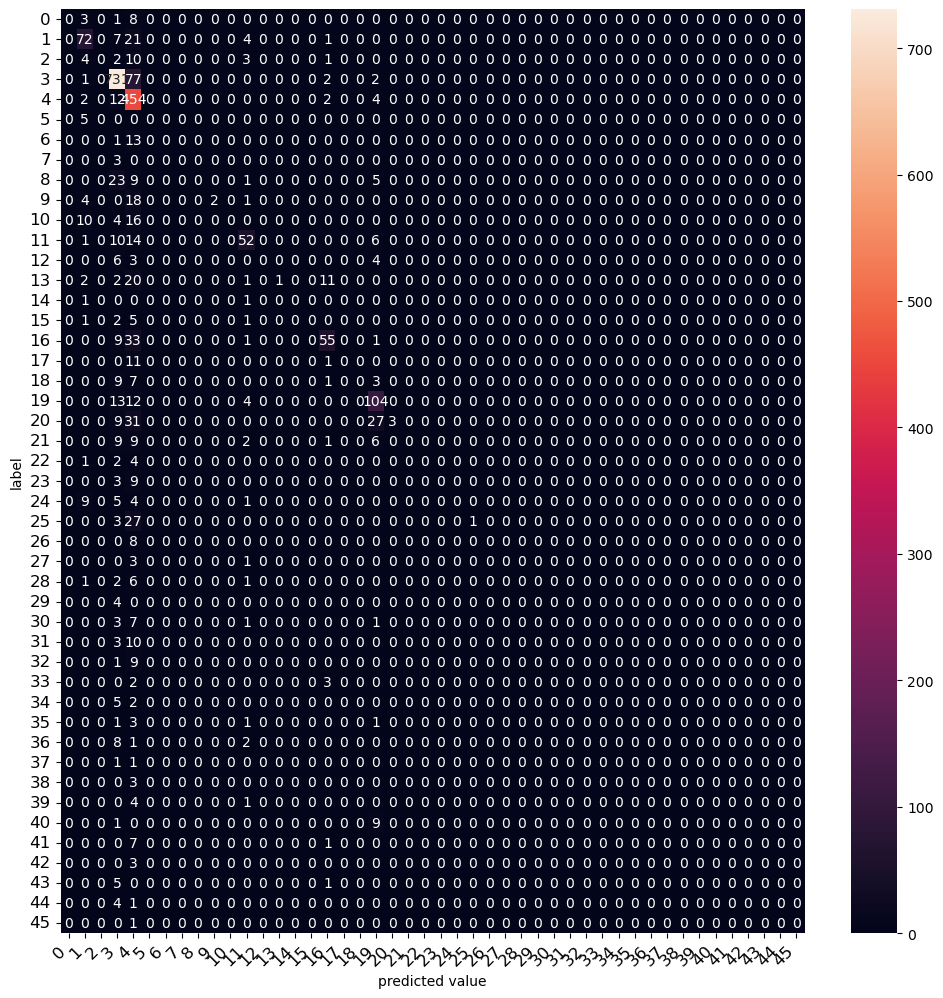

In [66]:
graph_confusion_matrix(model1, tfidfv_test1, y_test_10)

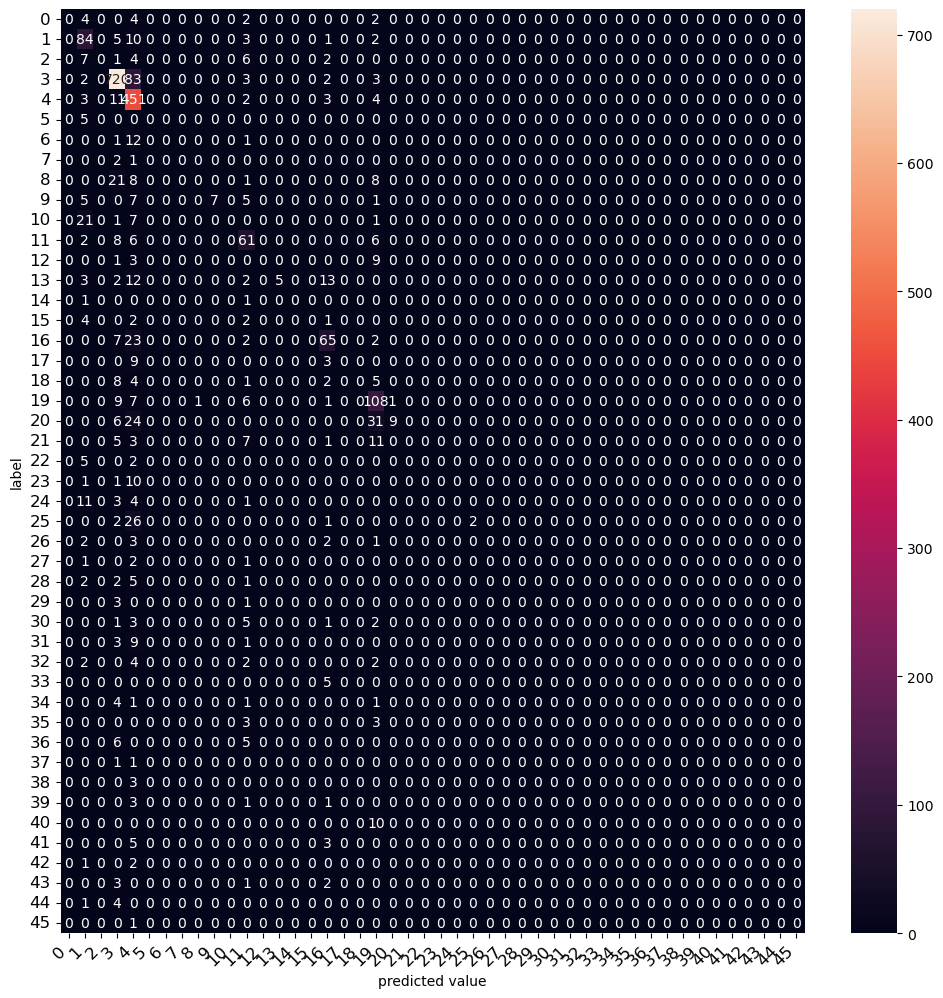

In [67]:
graph_confusion_matrix(model2, tfidfv_test2, y_test_5)

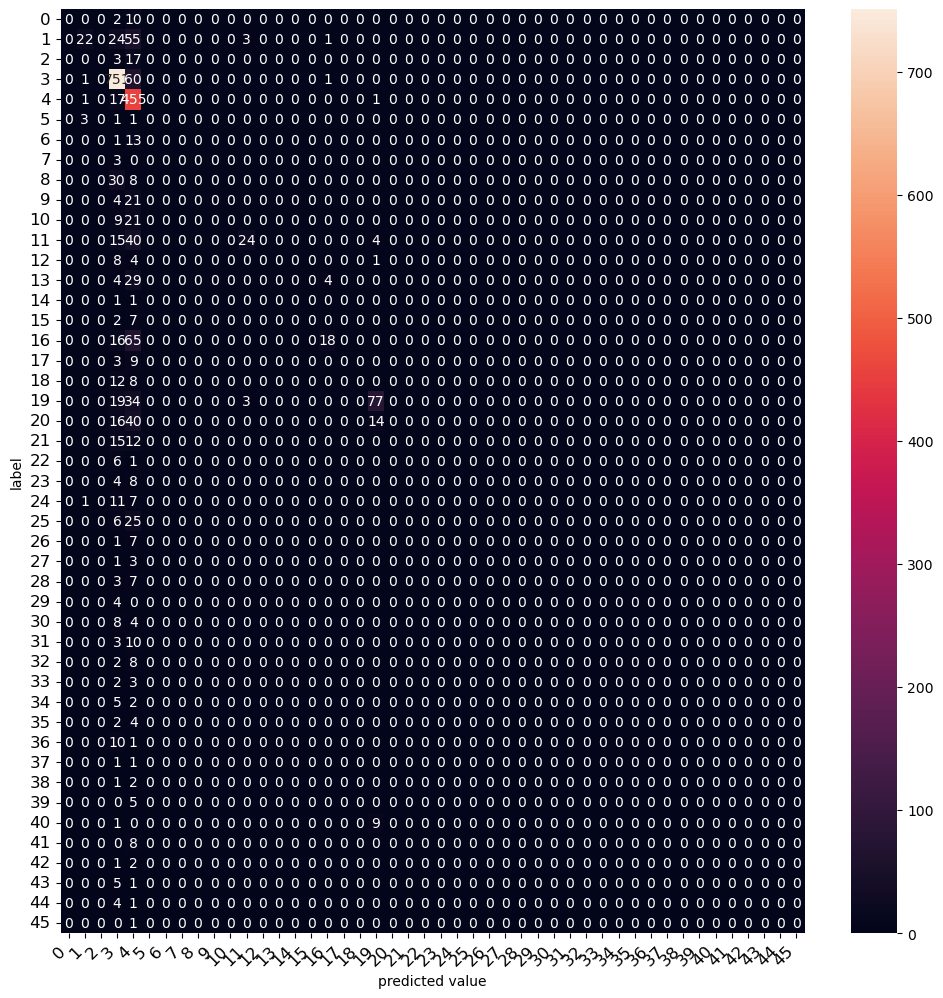

In [68]:
graph_confusion_matrix(model3, tfidfv_test3, y_test_a)

## Complement Naive Bayes Classifier(CNB)

In [69]:
cb1 = ComplementNB()
cb1.fit(tfidfv1, y_train_10)

ComplementNB()

In [70]:
cb2 = ComplementNB()
cb2.fit(tfidfv2, y_train_5)

ComplementNB()

In [71]:
cb3 = ComplementNB()
cb3.fit(tfidfv3, y_train_a)

ComplementNB()

In [72]:
predicted1 = cb1.predict(tfidfv_test1) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_10, predicted1)) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [73]:
predicted2 = cb2.predict(tfidfv_test2) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5, predicted2)) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [74]:
predicted3 = cb3.predict(tfidfv_test3) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_a, predicted3)) #예측값과 실제값 비교

정확도: 0.7649154051647373


### 이번에도 역시 낮은게 더 좋은 값을 보인다. 노이즈가 많은 데이터이거나 필요없는 값들이 너무 섞여있는듯하다.


## 로지스틱 회귀(Logistic Regression)

In [75]:
lr1 = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr1.fit(tfidfv1, y_train_10)

LogisticRegression(C=10000, max_iter=3000)

In [76]:
lr2 = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr2.fit(tfidfv2, y_train_5)

LogisticRegression(C=10000, max_iter=3000)

In [77]:
lr3 = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr3.fit(tfidfv3, y_train_a)

LogisticRegression(C=10000, max_iter=3000)

In [78]:
predicted1 = lr1.predict(tfidfv_test1) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_10, predicted1)) #예측값과 실제값 비교

정확도: 0.8085485307212823


In [79]:
predicted2 = lr2.predict(tfidfv_test2) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5, predicted2)) #예측값과 실제값 비교

정확도: 0.8058771148708815


In [80]:
predicted3 = lr3.predict(tfidfv_test3) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_a, predicted3)) #예측값과 실제값 비교

정확도: 0.811219946571683


### 이번에는 전체가 포함된것이 가장 좋은 결과로 예측된다.
모델이 복잡해지면 더 많은 피쳐가 있을수록 성능이 향상되고 정규화를 통해 과적합이 방지되며 효과적인 활용이 된것으로 예측된다.

## 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [86]:
lsvc1 = LinearSVC(C=1000, penalty='l1', max_iter=5000, dual=False, tol=1e-4)
lsvc1.fit(tfidfv1, y_train_10)

C:\Users\lion4464\anaconda3\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=5000, penalty='l1')

In [82]:
lsvc2 = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc2.fit(tfidfv2, y_train_5)

C:\Users\lion4464\anaconda3\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [83]:
lsvc3 = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc3.fit(tfidfv3, y_train_a)

C:\Users\lion4464\anaconda3\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [87]:
# Linear SVC 테스트 데이터에 대한 예측해보세요
predicted1 = lsvc1.predict(tfidfv_test1) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_10, predicted1)) #예측값과 실제값 비교

정확도: 0.7871772039180766


In [89]:
# Linear SVC 테스트 데이터에 대한 예측해보세요
predicted2 = lsvc2.predict(tfidfv_test2) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5, predicted2)) #예측값과 실제값 비교

정확도: 0.773820124666073


In [90]:
# Linear SVC 테스트 데이터에 대한 예측해보세요
predicted3 = lsvc3.predict(tfidfv_test3) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_a, predicted3)) #예측값과 실제값 비교

정확도: 0.7889581478183437


### 이번에도 역시 전범위가 제일 좋은값을 출력합니다. 이또한 복잡성과 정규화, 규제로 인한것으로 보여집니다.

## 결정 트리(Decision Tree)


In [92]:
tree1 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree1.fit(tfidfv1, y_train_10)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [93]:
tree2 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree2.fit(tfidfv2, y_train_5)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [94]:
tree3 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree3.fit(tfidfv3, y_train_a)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [95]:
predicted1 = tree1.predict(tfidfv_test1) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_10, predicted1)) #예측값과 실제값 비교

정확도: 0.6202137132680321


In [96]:
predicted2 = tree2.predict(tfidfv_test2) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5, predicted2)) #예측값과 실제값 비교

정확도: 0.6179875333926982


In [97]:
predicted3 = tree3.predict(tfidfv_test3) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_a, predicted3)) #예측값과 실제값 비교

정확도: 0.6211041852181657


### 결정트리도 마찬가지로 값이 높을수록 정확도가 상승한다.

## 랜덤 포레스트(Random Forest)

In [98]:
from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier(n_estimators=5, random_state=0)
forest1.fit(tfidfv1, y_train_10)

RandomForestClassifier(n_estimators=5, random_state=0)

In [99]:
forest2 = RandomForestClassifier(n_estimators=5, random_state=0)
forest2.fit(tfidfv2, y_train_5)

RandomForestClassifier(n_estimators=5, random_state=0)

In [100]:
forest3 = RandomForestClassifier(n_estimators=5, random_state=0)
forest3.fit(tfidfv3, y_train_a)

RandomForestClassifier(n_estimators=5, random_state=0)

In [102]:
predicted1 = forest1.predict(tfidfv_test1) #테스트 데이터에 대한 예측
predicted1 = forest2.predict(tfidfv_test2) #테스트 데이터에 대한 예측
predicted1 = forest3.predict(tfidfv_test3) #테스트 데이터에 대한 예측
print("정확도10:", accuracy_score(y_test_10, predicted1)) #예측값과 실제값 비교

print("정확도5:", accuracy_score(y_test_5, predicted2)) #예측값과 실제값 비교

print("정확도a:", accuracy_score(y_test_a, predicted3)) #예측값과 실제값 비교

정확도10: 0.6544968833481746
정확도5: 0.6179875333926982
정확도a: 0.6211041852181657


### 이번엔 10000짜리가 제일 높은걸 확인할수 있다. 이는 적당한 범위에 값이라 과적합이 방지되어 그럼으로 보여진다. 적당한 균형을 유지하는 값이 1만으로 여겨진다

## 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [103]:
grbt1 = GradientBoostingClassifier(random_state=0) # verbose=3
grbt1.fit(tfidfv1, y_train_10)

GradientBoostingClassifier(random_state=0)

In [104]:
grbt2 = GradientBoostingClassifier(random_state=0) # verbose=3
grbt2.fit(tfidfv2, y_train_5)

GradientBoostingClassifier(random_state=0)

In [105]:
grbt3 = GradientBoostingClassifier(random_state=0) # verbose=3
grbt3.fit(tfidfv3, y_train_a)

GradientBoostingClassifier(random_state=0)

In [106]:
predicted1 = grbt1.predict(tfidfv_test1) #테스트 데이터에 대한 예측
predicted1 = grbt2.predict(tfidfv_test2) #테스트 데이터에 대한 예측
predicted1 = grbt3.predict(tfidfv_test3) #테스트 데이터에 대한 예측
print("정확도10:", accuracy_score(y_test_10, predicted1)) #예측값과 실제값 비교

print("정확도5:", accuracy_score(y_test_5, predicted2)) #예측값과 실제값 비교

print("정확도a:", accuracy_score(y_test_a, predicted3)) #예측값과 실제값 비교

정확도10: 0.7680320569902048
정확도5: 0.6179875333926982
정확도a: 0.6211041852181657


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

# 개별 모델 선언
logistic_regression = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
complement_nb = ComplementNB()
gradient_boosting = GradientBoostingClassifier()

# VotingClassifier 선언

voting_classifier1 = VotingClassifier(
    estimators=[
        ('logistic', logistic_regression),
        ('complement_nb', complement_nb),
        ('gradient_boosting', gradient_boosting)
    ],
    voting='soft'
)
voting_classifier2 = VotingClassifier(
    estimators=[
        ('logistic', logistic_regression),
        ('complement_nb', complement_nb),
        ('gradient_boosting', gradient_boosting)
    ],
    voting='soft'
)
voting_classifier3 = VotingClassifier(
    estimators=[
        ('logistic', logistic_regression),
        ('complement_nb', complement_nb),
        ('gradient_boosting', gradient_boosting)
    ],
    voting='soft'
)



In [110]:
# 모델 학습
voting_classifier1.fit(tfidfv1, y_train_10)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=10000, max_iter=3000)),
                             ('complement_nb', ComplementNB()),
                             ('gradient_boosting',
                              GradientBoostingClassifier())],
                 voting='soft')

In [111]:
voting_classifier2.fit(tfidfv2, y_train_5)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=10000, max_iter=3000)),
                             ('complement_nb', ComplementNB()),
                             ('gradient_boosting',
                              GradientBoostingClassifier())],
                 voting='soft')

In [112]:
voting_classifier3.fit(tfidfv3, y_train_a)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=10000, max_iter=3000)),
                             ('complement_nb', ComplementNB()),
                             ('gradient_boosting',
                              GradientBoostingClassifier())],
                 voting='soft')

In [113]:
predicted1 = voting_classifier1.predict(tfidfv_test1) #테스트 데이터에 대한 예측
print("정확도1:", accuracy_score(y_test_10, predicted1)) #예측값과 실제값 비교
predicted2 = voting_classifier2.predict(tfidfv_test2) #테스트 데이터에 대한 예측
print("정확도2:", accuracy_score(y_test_5, predicted2)) #예측값과 실제값 비교
predicted3 = voting_classifier3.predict(tfidfv_test3) #테스트 데이터에 대한 예측
print("정확도3:", accuracy_score(y_test_a, predicted3)) #예측값과 실제값 비교

정확도1: 0.815227070347284
정확도2: 0.8174532502226179
정확도3: 0.8156723063223509
